In [1]:
from ase.io.trajectory import TrajectoryReader as tr
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
traj_dft = tr("../data/dft/dft_pyscf_ase_force.traj")
traj_dmc = tr("../data/dmc/dmc_400blocks_set3.traj")

12001


In [3]:
traj_dft_force = tr("../train/amptorch_dft_force/h2o_amptorch_dmc_train.traj")
traj_dft_noforce = tr("../train/amptorch_dft_noforce/h2o_amptorch_dmc_train.traj")
traj_dmc = tr("../train/amptorch_dmc/h2o_amptorch_dmc_train.traj")

In [4]:
def calc_force_mae(traj_1, traj_2):
    mae = 0
    for i in range(len(traj_1)):
        mae += np.abs(traj_1[i].get_forces() - traj_2[i].get_forces()).mean()
    return mae / len(traj_1)

In [5]:
print(calc_force_mae(traj_dft, traj_dft_force))
print(calc_force_mae(traj_dft, traj_dft_noforce))

0.8066818742455905


ValueError: operands could not be broadcast together with shapes (3,3) (0,) 

In [7]:
uncertainty = []
for image in data:
    uncertainty.append(image.info["uncertainty"])

np.mean(uncertainty)

0.017196335638696776

In [18]:
oh1 = set()
theta = set()
for image in data[1:]:
    oh1.add("{:.4f}".format(image.get_distance(0,1)))
    theta.add("{:.2f}".format(image.get_angle(2,0,1)))
print(sorted(list(oh1)))
print(sorted(list(theta)))

['0.6783', '0.7413', '0.8043', '0.8673', '0.9302', '0.9932', '1.0562', '1.1192', '1.1822', '1.2452', '1.3081', '1.3082', '1.3711', '1.4341', '1.4971', '1.5601', '1.6231', '1.6861', '1.7490', '1.8120', '1.8750']
['100.20', '104.40', '108.60', '112.80', '117.00', '121.20', '125.40', '129.60', '133.80', '138.00', '142.20', '146.40', '150.60', '154.80', '159.00', '163.20', '167.40', '171.60', '175.80', '54.00', '58.20', '62.40', '66.60', '70.80', '75.00', '79.20', '83.40', '87.60', '91.80', '96.00']


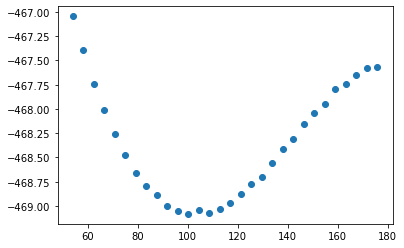

In [19]:
# check angle PES
energies = []
angles = []
for image in data[1:]:
    if "{:.4f}".format(image.get_distance(0, 1)) == "0.9932" and "{:.4f}".format(image.get_distance(0, 2)) == "0.9932":
        angles.append(image.get_angle(2,0,1))
        energies.append(image.get_potential_energy())
plt.scatter(angles, energies)

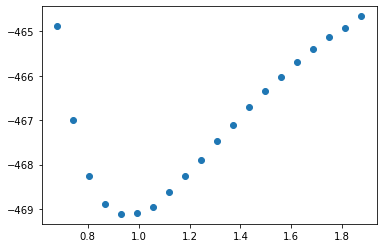

In [20]:
# check bond distance PES
energies = []
distances = []
for image in data[1:]:
    if "{:.2f}".format(image.get_angle(2, 0, 1)) == "104.40" and "{:.4f}".format(image.get_distance(0, 2)) == "0.9302":
        distances.append(image.get_distance(0, 1))
        energies.append(image.get_potential_energy())
plt.scatter(distances, energies)